In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MaxAbsScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import scipy.io
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import matplotlib

In [4]:
indices = 3
features = 19
patients = 100


def create_data():
    out = open('data/epileptic-seizure-recognition.csv', 'w')
    out.write('patient_id')
    
    patient_id = 1
    
    for i in range(features):
        out.write(',avg_{}'.format(i))
        out.write(',absavg_{}'.format(i))
    
    out.write(',group\n')
        
    for i in range(indices):
        file_name = 'Group{}'.format(i + 1)
        data = scipy.io.loadmat('data/{}.mat'.format(file_name))[file_name][0]
        
        for index in range(patients):
            if index % 10 == 0:
                print('Read {} of {} ({}%)'.format(index, patients, round((index / patients) * 100, 2)))
            if index == patients - 1:
                print('Done')
            
            patient = data[index]
            out.write(str(patient_id))
            
            for column in range(features):
                mean = patient[column].mean()
                abs_mean = np.mean(np.abs(patient[column]))
                out.write(',{}'.format(str(mean)))
                out.write(',{}'.format(str(abs_mean)))
                
            out.write(',{}\n'.format(i))
            
            patient_id += 1
                
    out.close()

In [5]:
create_data()

Read 0 of 100 (0.0%)
Read 10 of 100 (10.0%)
Read 20 of 100 (20.0%)
Read 30 of 100 (30.0%)
Read 40 of 100 (40.0%)
Read 50 of 100 (50.0%)
Read 60 of 100 (60.0%)
Read 70 of 100 (70.0%)
Read 80 of 100 (80.0%)
Read 90 of 100 (90.0%)
Done
Read 0 of 100 (0.0%)
Read 10 of 100 (10.0%)
Read 20 of 100 (20.0%)
Read 30 of 100 (30.0%)
Read 40 of 100 (40.0%)
Read 50 of 100 (50.0%)
Read 60 of 100 (60.0%)
Read 70 of 100 (70.0%)
Read 80 of 100 (80.0%)
Read 90 of 100 (90.0%)
Done
Read 0 of 100 (0.0%)
Read 10 of 100 (10.0%)
Read 20 of 100 (20.0%)
Read 30 of 100 (30.0%)
Read 40 of 100 (40.0%)
Read 50 of 100 (50.0%)
Read 60 of 100 (60.0%)
Read 70 of 100 (70.0%)
Read 80 of 100 (80.0%)
Read 90 of 100 (90.0%)
Done


In [36]:
dataset = pd.read_csv('data/epileptic-seizure-recognition.csv')

In [37]:
dataset

,patient_id,avg_0,absavg_0,avg_1,absavg_1,avg_2,absavg_2,avg_3,absavg_3,avg_4,...,absavg_14,avg_15,absavg_15,avg_16,absavg_16,avg_17,absavg_17,avg_18,absavg_18,group
0,1,-1.567771,6.321031,-1.573988,5.917349,-1.485856,5.434132,-1.303374,4.614920,-1.199995,...,5.157136,-0.741922,5.069529,-0.742950,4.508849,-0.689184,4.249429,-0.580625,4.077171,0
1,2,0.960448,5.267176,1.012752,6.034716,1.226582,7.115756,1.601939,8.170547,1.803472,...,6.560198,0.146380,8.555030,0.251696,10.040230,0.330662,10.503656,0.383278,9.778402,0
2,3,0.480577,3.114553,0.524297,3.209169,0.489968,3.400240,0.377591,4.173540,0.281214,...,3.835670,0.000092,3.788152,0.089763,4.232388,0.021637,4.377486,-0.204287,5.255272,0
3,4,-0.679002,6.367377,-0.553470,6.678147,-0.486175,6.390697,-0.477117,5.800700,-0.470709,...,6.670589,-0.534675,8.134418,-0.580668,8.860792,-0.401912,8.717842,0.001593,7.737428,0
4,5,-0.353583,4.643299,-0.459126,5.123414,-0.568474,5.691578,-0.681625,6.229721,-0.735567,...,3.047171,-0.048722,3.423857,0.086665,4.193302,0.189333,4.582509,0.259282,4.435160,0
5,6,-0.013243,3.041470,-0.014264,3.314793,-0.074392,3.640691,-0.193629,4.094651,-0.273983,...,5.335221,-0.648963,4.729128,-0.624735,4.178287,-0.564768,3.722458,-0.469063,2.999737,0
6,7,-0.020476,5.832493,0.054124,6.545937,0.174398,7.548701,0.340346,8.826772,0.442393,...,2.978212,-0.139851,4.133884,-0.115498,5.298544,-0.066357,5.583482,0.007571,5.297706,0
7,8,-0.004156,5.310344,-0.008301,5.325327,-0.011566,4.942070,-0.013949,4.286122,-0.022821,...,4.381330,-0.408046,5.198116,-0.329898,5.705334,-0.246457,5.754036,-0.157723,5.362528,0
8,9,-0.353583,4.643299,-0.459126,5.123414,-0.568474,5.691578,-0.681625,6.229721,-0.735567,...,3.047171,-0.048722,3.423857,0.086665,4.193302,0.189333,4.582509,0.259282,4.435160,0
9,10,-0.013243,3.041470,-0.014264,3.314793,-0.074392,3.640691,-0.193629,4.094651,-0.273983,...,5.335221,-0.648963,4.729128,-0.624735,4.178287,-0.564768,3.722458,-0.469063,2.999737,0


In [8]:
patient_ids = dataset.iloc[:, 0]
x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

Text(0.5, 0, 'Features')

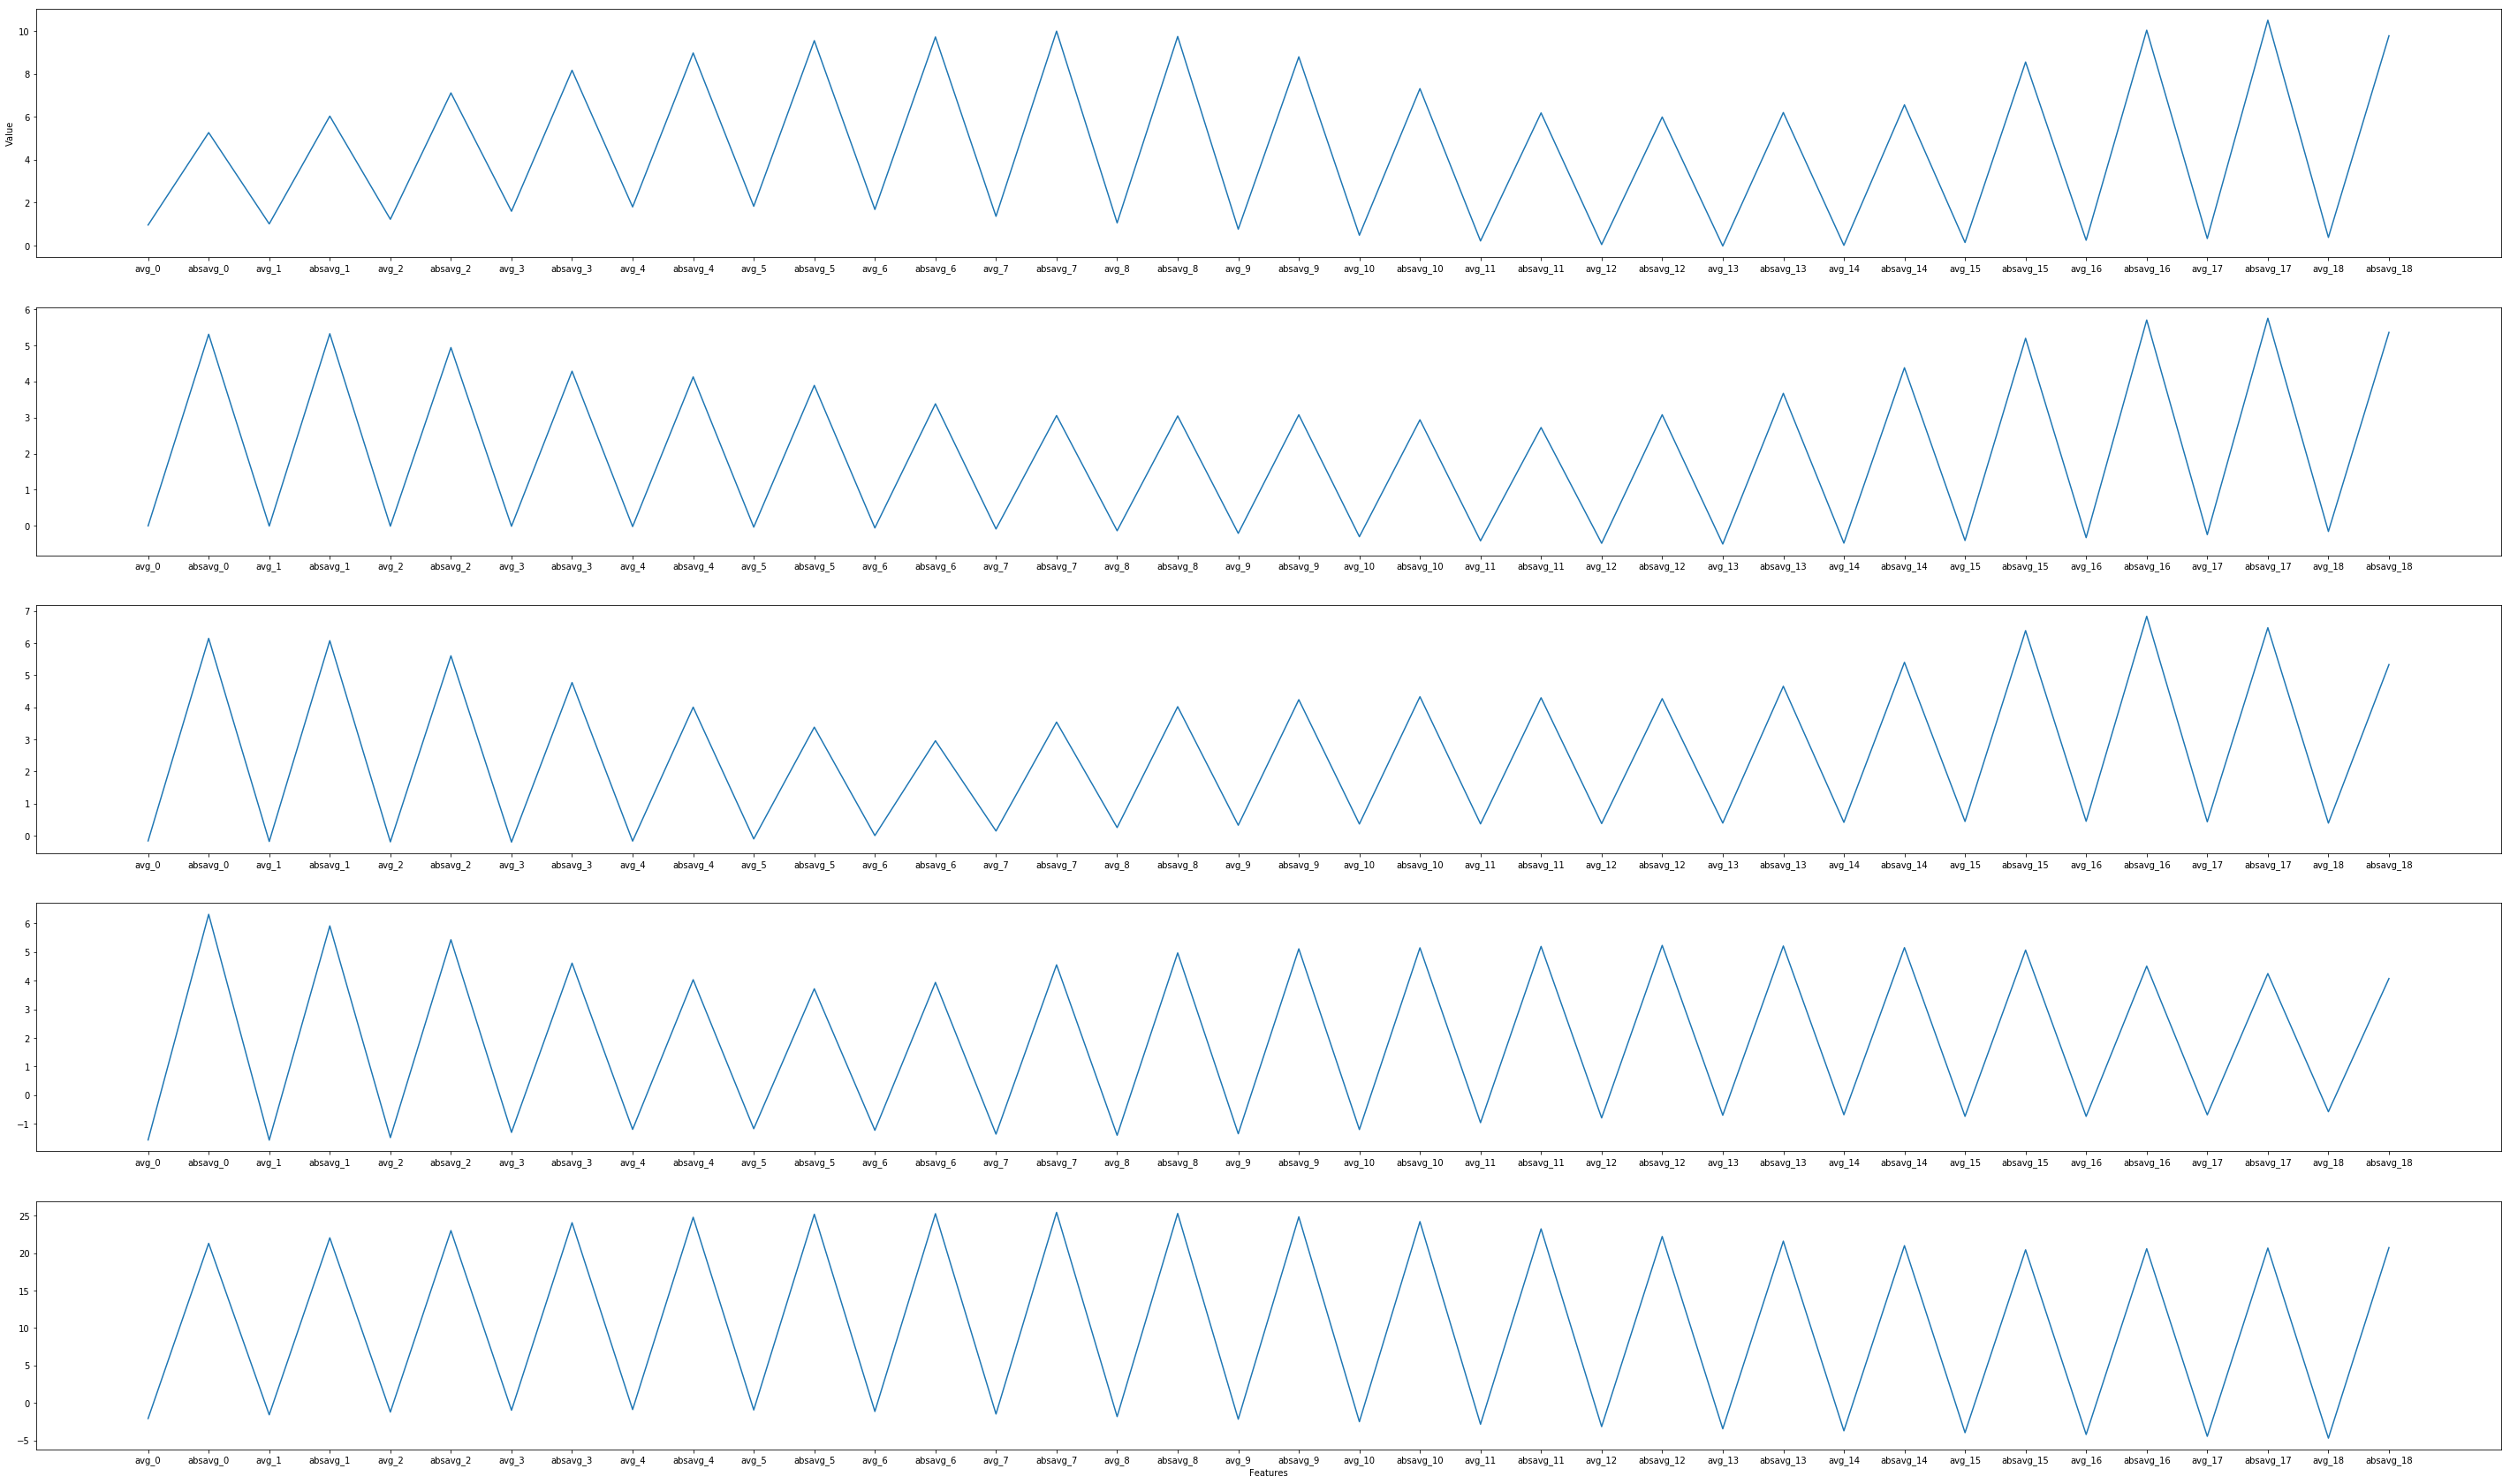

In [9]:
plt.rcParams["figure.figsize"] = (50, 30)
plt.subplot(511)
plt.plot(x.iloc[1,:])
plt.ylabel('Value')
plt.subplot(512)
plt.plot(x.iloc[7,:])
plt.subplot(513)
plt.plot(x.iloc[12,:])
plt.subplot(514)
plt.plot(x.iloc[0,:])
plt.subplot(515)
plt.plot(x.iloc[232,:])
plt.xlabel('Features')

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Text(0.5, 0, 'Features')

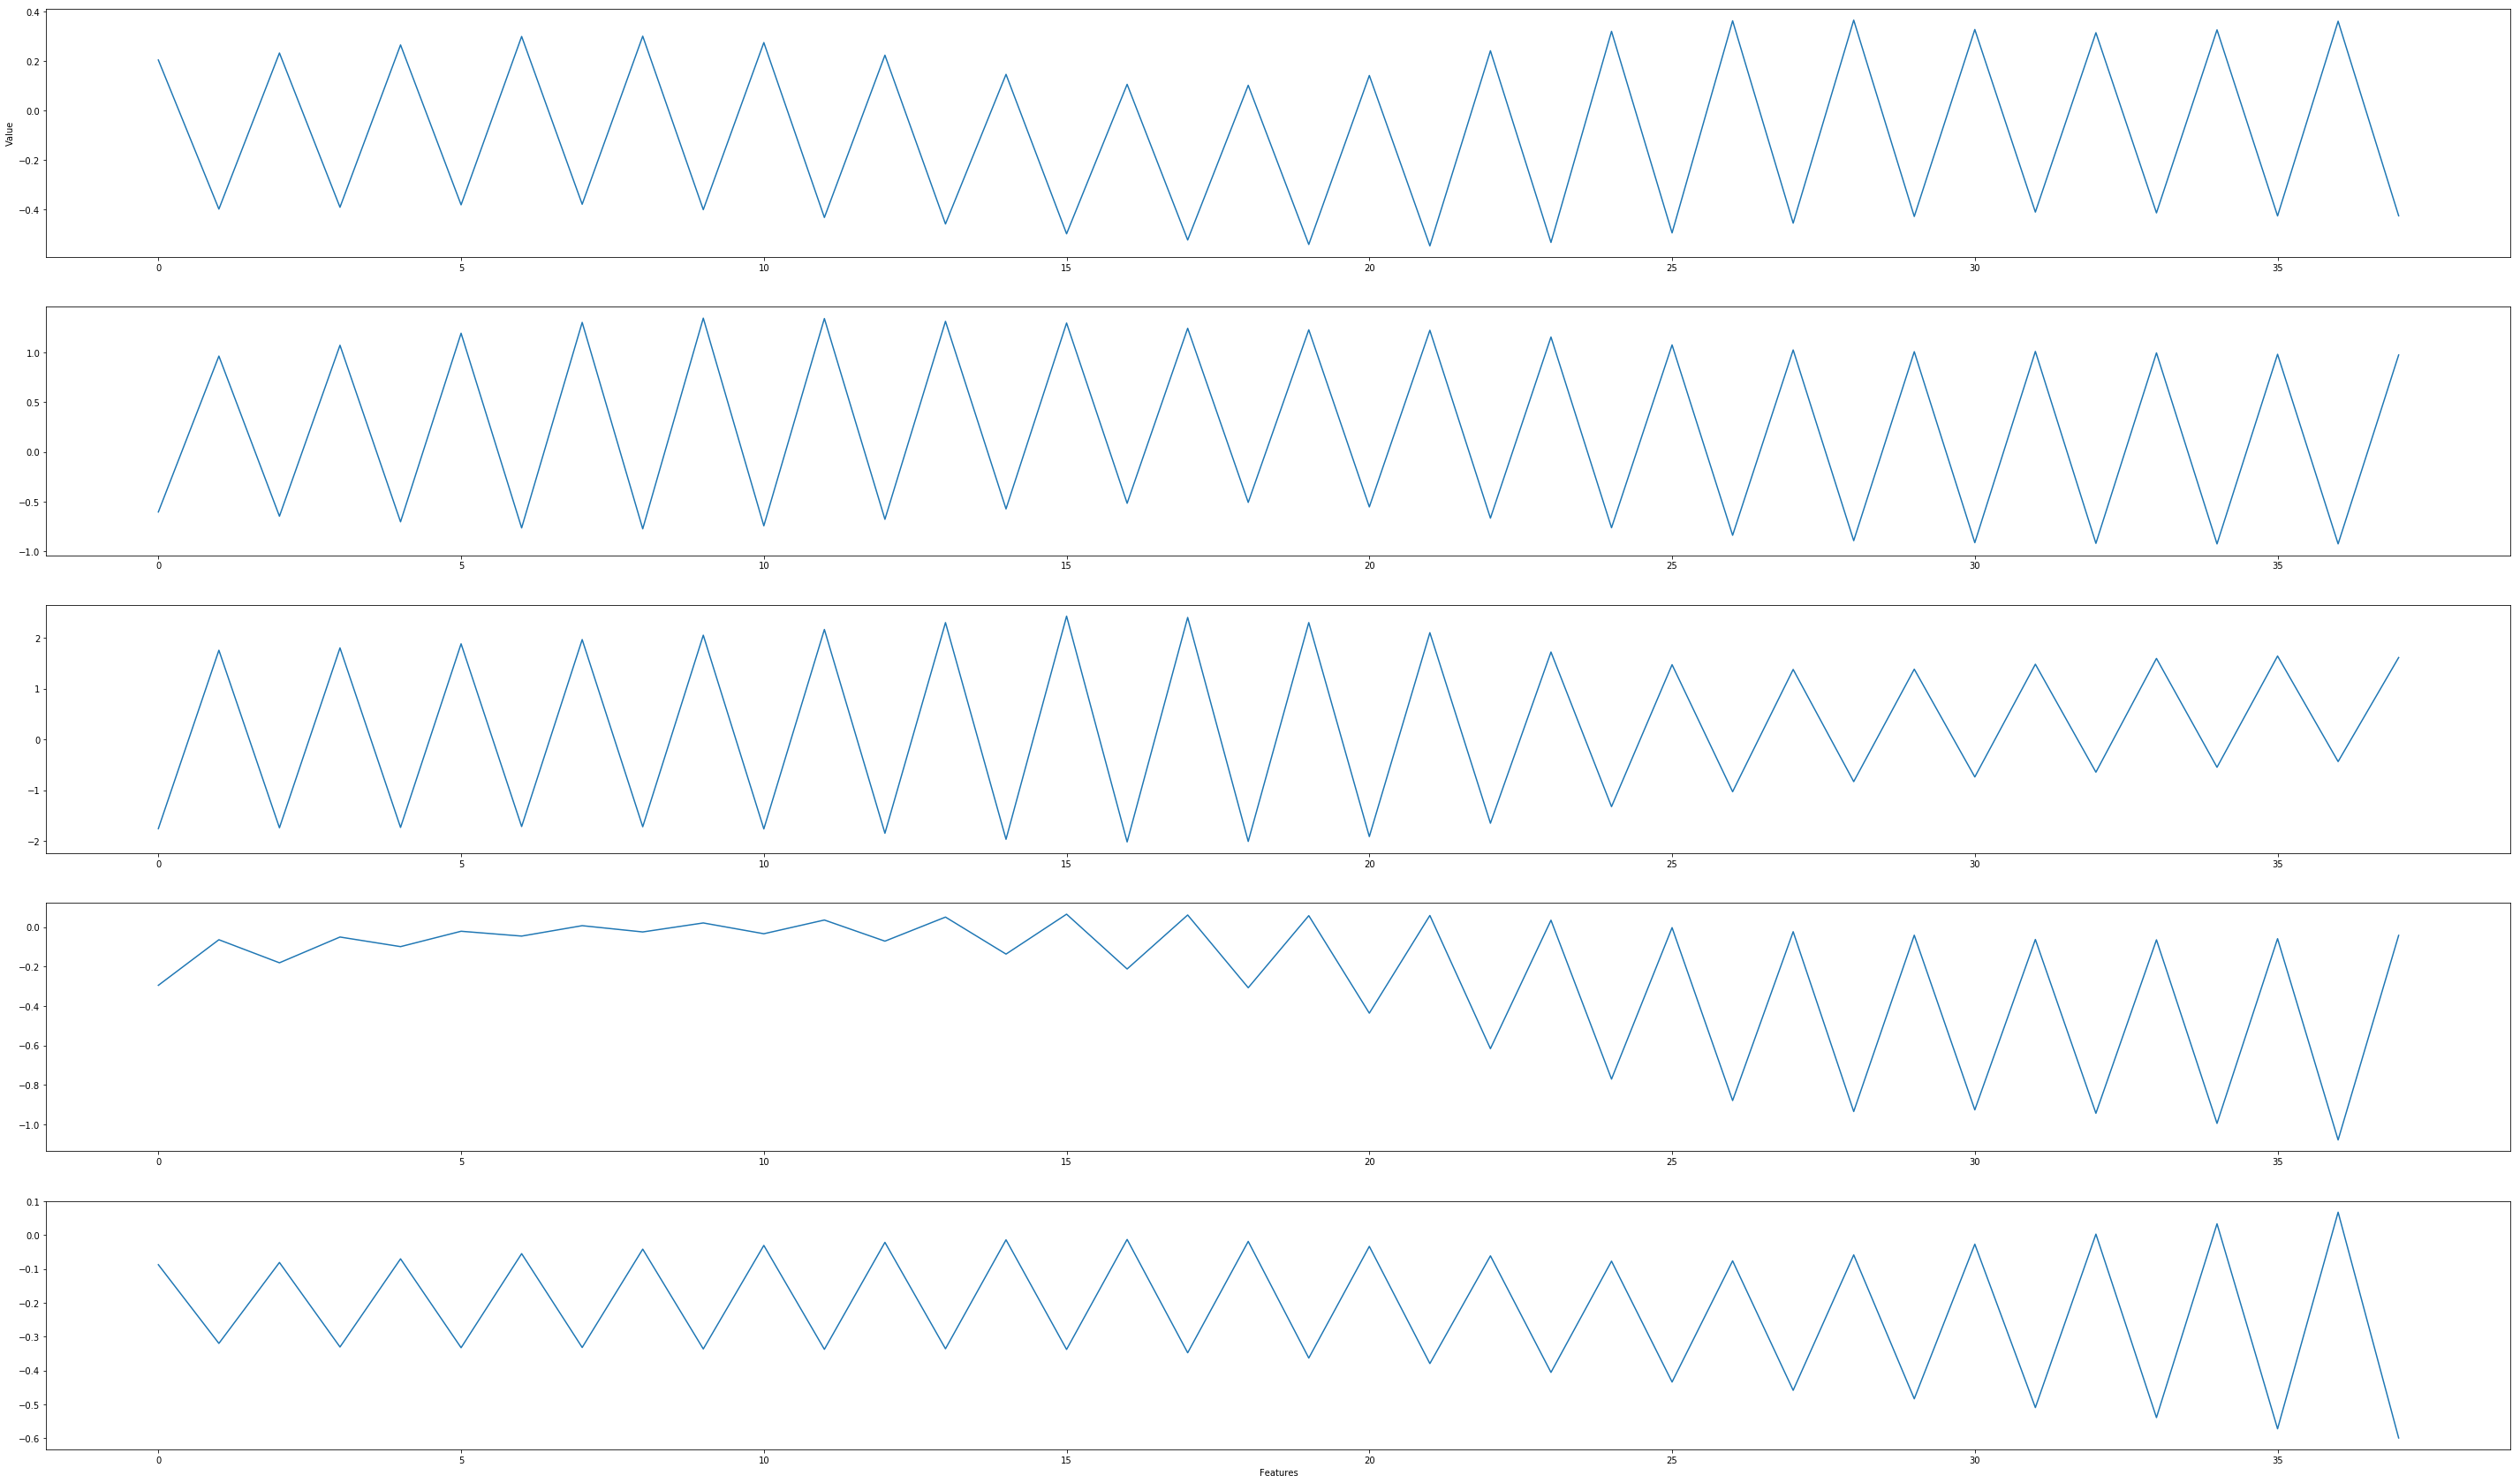

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

plt.rcParams["figure.figsize"] = (50, 30)
plt.subplot(511)
plt.plot(x_train[1,:])
plt.ylabel('Value')
plt.subplot(512)
plt.plot(x_train[7,:])
plt.subplot(513)
plt.plot(x_train[12,:])
plt.subplot(514)
plt.plot(x_train[0,:])
plt.subplot(515)
plt.plot(x_train[232,:])
plt.xlabel('Features')

In [12]:
def build_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [13]:
models = [SVC(), LinearSVC(), KNeighborsClassifier(), GaussianNB()]

for model in models:
    print('Accuracy for {} is about {}'.format(model.__class__.__name__, build_model(model)))

Accuracy for SVC is about 0.75
Accuracy for LinearSVC is about 0.7666666666666667
Accuracy for KNeighborsClassifier is about 0.7333333333333333
Accuracy for GaussianNB is about 0.7833333333333333


In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [59]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_train = to_categorical(y_train)

In [60]:
encoder = LabelEncoder()
encoder.fit(y_test)
y_test = encoder.transform(y_test)
y_test = to_categorical(y_test)

In [61]:
classifier = Sequential()
classifier.add(Dense(8, input_dim=38, activation='relu'))
classifier.add(Dense(3, activation='softmax'))
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
classifier.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 10, nb_epoch = 1000)

Train on 240 samples, validate on 60 samples
Epoch 1/1000
240/240 [==============================] - 0s 942us/step - loss: 4.4195 - acc: 0.3708 - val_loss: 2.1617 - val_acc: 0.3833
Epoch 2/1000
240/240 [==============================] - 0s 138us/step - loss: 1.6314 - acc: 0.3250 - val_loss: 1.3262 - val_acc: 0.4000
Epoch 3/1000
240/240 [==============================] - 0s 110us/step - loss: 1.3770 - acc: 0.3250 - val_loss: 1.3475 - val_acc: 0.3833
Epoch 4/1000
240/240 [==============================] - 0s 112us/step - loss: 1.2419 - acc: 0.3458 - val_loss: 1.3597 - val_acc: 0.4167
Epoch 5/1000
240/240 [==============================] - 0s 121us/step - loss: 1.1467 - acc: 0.3750 - val_loss: 1.2424 - val_acc: 0.4500
Epoch 6/1000
240/240 [==============================] - 0s 129us/step - loss: 1.0873 - acc: 0.3958 - val_loss: 1.2510 - val_acc: 0.5000
Epoch 7/1000
240/240 [==============================] - 0s 132us/step - loss: 1.0450 - acc: 0.3833 - val_loss: 0.9528 - val_acc: 0.4500
Epo

240/240 [==============================] - 0s 97us/step - loss: 0.6434 - acc: 0.7708 - val_loss: 0.5773 - val_acc: 0.7333
Epoch 61/1000
240/240 [==============================] - 0s 94us/step - loss: 0.6397 - acc: 0.7708 - val_loss: 0.5803 - val_acc: 0.7333
Epoch 62/1000
240/240 [==============================] - 0s 94us/step - loss: 0.6354 - acc: 0.7458 - val_loss: 0.5790 - val_acc: 0.7000
Epoch 63/1000
240/240 [==============================] - 0s 95us/step - loss: 0.6335 - acc: 0.7625 - val_loss: 0.5733 - val_acc: 0.7000
Epoch 64/1000
240/240 [==============================] - 0s 103us/step - loss: 0.6313 - acc: 0.7667 - val_loss: 0.5780 - val_acc: 0.7333
Epoch 65/1000
240/240 [==============================] - 0s 99us/step - loss: 0.6259 - acc: 0.7625 - val_loss: 0.5763 - val_acc: 0.7000
Epoch 66/1000
240/240 [==============================] - 0s 96us/step - loss: 0.6277 - acc: 0.7708 - val_loss: 0.5734 - val_acc: 0.7167
Epoch 67/1000
240/240 [==============================] - 0s 9

Epoch 120/1000
240/240 [==============================] - 0s 94us/step - loss: 0.5373 - acc: 0.7875 - val_loss: 0.4966 - val_acc: 0.7500
Epoch 121/1000
240/240 [==============================] - 0s 98us/step - loss: 0.5385 - acc: 0.7792 - val_loss: 0.4966 - val_acc: 0.7333
Epoch 122/1000
240/240 [==============================] - 0s 96us/step - loss: 0.5379 - acc: 0.7792 - val_loss: 0.4924 - val_acc: 0.7500
Epoch 123/1000
240/240 [==============================] - 0s 99us/step - loss: 0.5363 - acc: 0.7917 - val_loss: 0.4945 - val_acc: 0.7500
Epoch 124/1000
240/240 [==============================] - 0s 126us/step - loss: 0.5346 - acc: 0.7792 - val_loss: 0.4947 - val_acc: 0.7333
Epoch 125/1000
240/240 [==============================] - 0s 130us/step - loss: 0.5364 - acc: 0.7792 - val_loss: 0.4927 - val_acc: 0.7500
Epoch 126/1000
240/240 [==============================] - 0s 134us/step - loss: 0.5374 - acc: 0.7583 - val_loss: 0.4896 - val_acc: 0.7500
Epoch 127/1000
240/240 [==============

240/240 [==============================] - 0s 93us/step - loss: 0.4851 - acc: 0.7833 - val_loss: 0.4706 - val_acc: 0.7500
Epoch 180/1000
240/240 [==============================] - 0s 94us/step - loss: 0.4893 - acc: 0.7750 - val_loss: 0.4724 - val_acc: 0.7333
Epoch 181/1000
240/240 [==============================] - 0s 91us/step - loss: 0.4875 - acc: 0.7833 - val_loss: 0.4702 - val_acc: 0.7667
Epoch 182/1000
240/240 [==============================] - 0s 95us/step - loss: 0.4863 - acc: 0.7917 - val_loss: 0.4667 - val_acc: 0.7667
Epoch 183/1000
240/240 [==============================] - 0s 91us/step - loss: 0.4866 - acc: 0.7792 - val_loss: 0.4709 - val_acc: 0.7333
Epoch 184/1000
240/240 [==============================] - 0s 90us/step - loss: 0.5025 - acc: 0.7542 - val_loss: 0.5782 - val_acc: 0.7167
Epoch 185/1000
240/240 [==============================] - 0s 94us/step - loss: 0.5348 - acc: 0.7792 - val_loss: 0.4723 - val_acc: 0.7333
Epoch 186/1000
240/240 [==============================] 

240/240 [==============================] - 0s 142us/step - loss: 0.4715 - acc: 0.7833 - val_loss: 0.4752 - val_acc: 0.7333
Epoch 239/1000
240/240 [==============================] - 0s 98us/step - loss: 0.4698 - acc: 0.7917 - val_loss: 0.4731 - val_acc: 0.7333
Epoch 240/1000
240/240 [==============================] - 0s 127us/step - loss: 0.4684 - acc: 0.7917 - val_loss: 0.4815 - val_acc: 0.7333
Epoch 241/1000
240/240 [==============================] - 0s 95us/step - loss: 0.4681 - acc: 0.7917 - val_loss: 0.4771 - val_acc: 0.7500
Epoch 242/1000
240/240 [==============================] - 0s 105us/step - loss: 0.4677 - acc: 0.7917 - val_loss: 0.4790 - val_acc: 0.7333
Epoch 243/1000
240/240 [==============================] - 0s 127us/step - loss: 0.4782 - acc: 0.7917 - val_loss: 0.4815 - val_acc: 0.7333
Epoch 244/1000
240/240 [==============================] - 0s 151us/step - loss: 0.4715 - acc: 0.7833 - val_loss: 0.4847 - val_acc: 0.7167
Epoch 245/1000
240/240 [===========================

240/240 [==============================] - 0s 120us/step - loss: 0.4539 - acc: 0.8083 - val_loss: 0.4844 - val_acc: 0.7500
Epoch 298/1000
240/240 [==============================] - 0s 107us/step - loss: 0.4558 - acc: 0.7917 - val_loss: 0.4897 - val_acc: 0.7333
Epoch 299/1000
240/240 [==============================] - 0s 104us/step - loss: 0.4582 - acc: 0.7958 - val_loss: 0.4788 - val_acc: 0.7333
Epoch 300/1000
240/240 [==============================] - 0s 132us/step - loss: 0.4575 - acc: 0.7958 - val_loss: 0.4898 - val_acc: 0.7333
Epoch 301/1000
240/240 [==============================] - 0s 130us/step - loss: 0.4566 - acc: 0.8042 - val_loss: 0.4854 - val_acc: 0.7333
Epoch 302/1000
240/240 [==============================] - 0s 137us/step - loss: 0.4615 - acc: 0.8125 - val_loss: 0.5608 - val_acc: 0.7167
Epoch 303/1000
240/240 [==============================] - 0s 142us/step - loss: 0.4811 - acc: 0.7792 - val_loss: 0.5209 - val_acc: 0.7167
Epoch 304/1000
240/240 [=========================

240/240 [==============================] - 0s 101us/step - loss: 0.4534 - acc: 0.8000 - val_loss: 0.4890 - val_acc: 0.7667
Epoch 357/1000
240/240 [==============================] - 0s 110us/step - loss: 0.4425 - acc: 0.8167 - val_loss: 0.5226 - val_acc: 0.7333
Epoch 358/1000
240/240 [==============================] - 0s 128us/step - loss: 0.4459 - acc: 0.8083 - val_loss: 0.4988 - val_acc: 0.7667
Epoch 359/1000
240/240 [==============================] - 0s 119us/step - loss: 0.4450 - acc: 0.8042 - val_loss: 0.5198 - val_acc: 0.7333
Epoch 360/1000
240/240 [==============================] - ETA: 0s - loss: 0.8043 - acc: 0.600 - 0s 141us/step - loss: 0.4481 - acc: 0.8042 - val_loss: 0.5008 - val_acc: 0.7500
Epoch 361/1000
240/240 [==============================] - 0s 103us/step - loss: 0.4477 - acc: 0.8000 - val_loss: 0.5330 - val_acc: 0.7167
Epoch 362/1000
240/240 [==============================] - 0s 125us/step - loss: 0.4413 - acc: 0.8083 - val_loss: 0.5048 - val_acc: 0.7500
Epoch 363/1

240/240 [==============================] - 0s 101us/step - loss: 0.4469 - acc: 0.7958 - val_loss: 0.5216 - val_acc: 0.7667
Epoch 416/1000
240/240 [==============================] - 0s 95us/step - loss: 0.4440 - acc: 0.7958 - val_loss: 0.5149 - val_acc: 0.7333
Epoch 417/1000
240/240 [==============================] - 0s 101us/step - loss: 0.4554 - acc: 0.8000 - val_loss: 0.6175 - val_acc: 0.7333
Epoch 418/1000
240/240 [==============================] - 0s 93us/step - loss: 0.4599 - acc: 0.8042 - val_loss: 0.5225 - val_acc: 0.7333
Epoch 419/1000
240/240 [==============================] - 0s 102us/step - loss: 0.4428 - acc: 0.8083 - val_loss: 0.5247 - val_acc: 0.7667
Epoch 420/1000
240/240 [==============================] - 0s 94us/step - loss: 0.4442 - acc: 0.7917 - val_loss: 0.5225 - val_acc: 0.7667
Epoch 421/1000
240/240 [==============================] - 0s 97us/step - loss: 0.4439 - acc: 0.8083 - val_loss: 0.5278 - val_acc: 0.7500
Epoch 422/1000
240/240 [=============================

Epoch 475/1000
240/240 [==============================] - 0s 106us/step - loss: 0.4288 - acc: 0.8208 - val_loss: 0.5338 - val_acc: 0.7667
Epoch 476/1000
240/240 [==============================] - 0s 103us/step - loss: 0.4298 - acc: 0.8000 - val_loss: 0.5244 - val_acc: 0.7833
Epoch 477/1000
240/240 [==============================] - 0s 103us/step - loss: 0.4261 - acc: 0.8083 - val_loss: 0.5479 - val_acc: 0.7500
Epoch 478/1000
240/240 [==============================] - 0s 102us/step - loss: 0.4288 - acc: 0.8167 - val_loss: 0.5226 - val_acc: 0.7667
Epoch 479/1000
240/240 [==============================] - 0s 108us/step - loss: 0.4280 - acc: 0.8250 - val_loss: 0.5367 - val_acc: 0.7500
Epoch 480/1000
240/240 [==============================] - 0s 108us/step - loss: 0.4318 - acc: 0.8083 - val_loss: 0.5583 - val_acc: 0.7500
Epoch 481/1000
240/240 [==============================] - 0s 103us/step - loss: 0.4279 - acc: 0.8167 - val_loss: 0.5353 - val_acc: 0.7500
Epoch 482/1000
240/240 [==========

240/240 [==============================] - 0s 94us/step - loss: 0.4371 - acc: 0.8125 - val_loss: 0.6056 - val_acc: 0.7500
Epoch 535/1000
240/240 [==============================] - 0s 95us/step - loss: 0.4250 - acc: 0.8167 - val_loss: 0.5124 - val_acc: 0.7667
Epoch 536/1000
240/240 [==============================] - 0s 94us/step - loss: 0.4188 - acc: 0.8167 - val_loss: 0.5723 - val_acc: 0.7500
Epoch 537/1000
240/240 [==============================] - 0s 94us/step - loss: 0.4212 - acc: 0.8208 - val_loss: 0.5181 - val_acc: 0.7667
Epoch 538/1000
240/240 [==============================] - 0s 95us/step - loss: 0.4189 - acc: 0.8167 - val_loss: 0.5535 - val_acc: 0.7500
Epoch 539/1000
240/240 [==============================] - 0s 93us/step - loss: 0.4175 - acc: 0.8167 - val_loss: 0.5645 - val_acc: 0.7500
Epoch 540/1000
240/240 [==============================] - 0s 100us/step - loss: 0.4177 - acc: 0.8042 - val_loss: 0.5222 - val_acc: 0.7667
Epoch 541/1000
240/240 [==============================]

240/240 [==============================] - 0s 102us/step - loss: 0.4083 - acc: 0.8292 - val_loss: 0.5376 - val_acc: 0.7667
Epoch 594/1000
240/240 [==============================] - 0s 102us/step - loss: 0.4081 - acc: 0.8125 - val_loss: 0.5518 - val_acc: 0.7500
Epoch 595/1000
240/240 [==============================] - 0s 100us/step - loss: 0.4074 - acc: 0.8167 - val_loss: 0.5606 - val_acc: 0.7500
Epoch 596/1000
240/240 [==============================] - 0s 108us/step - loss: 0.4130 - acc: 0.8167 - val_loss: 0.5756 - val_acc: 0.7500
Epoch 597/1000
240/240 [==============================] - 0s 105us/step - loss: 0.4074 - acc: 0.8208 - val_loss: 0.5400 - val_acc: 0.7833
Epoch 598/1000
240/240 [==============================] - 0s 97us/step - loss: 0.4087 - acc: 0.8250 - val_loss: 0.5461 - val_acc: 0.7667
Epoch 599/1000
240/240 [==============================] - 0s 99us/step - loss: 0.4073 - acc: 0.8208 - val_loss: 0.5823 - val_acc: 0.7500
Epoch 600/1000
240/240 [===========================

240/240 [==============================] - 0s 122us/step - loss: 0.4216 - acc: 0.8125 - val_loss: 0.5664 - val_acc: 0.7500
Epoch 653/1000
240/240 [==============================] - 0s 110us/step - loss: 0.4062 - acc: 0.8292 - val_loss: 0.6119 - val_acc: 0.7333
Epoch 654/1000
240/240 [==============================] - 0s 125us/step - loss: 0.4094 - acc: 0.8250 - val_loss: 0.6020 - val_acc: 0.7333
Epoch 655/1000
240/240 [==============================] - 0s 127us/step - loss: 0.4049 - acc: 0.8292 - val_loss: 0.5691 - val_acc: 0.7667
Epoch 656/1000
240/240 [==============================] - 0s 123us/step - loss: 0.4061 - acc: 0.8208 - val_loss: 0.5714 - val_acc: 0.7500
Epoch 657/1000
240/240 [==============================] - 0s 117us/step - loss: 0.4055 - acc: 0.8250 - val_loss: 0.5907 - val_acc: 0.7333
Epoch 658/1000
240/240 [==============================] - 0s 108us/step - loss: 0.4053 - acc: 0.8167 - val_loss: 0.6078 - val_acc: 0.7500
Epoch 659/1000
240/240 [=========================

240/240 [==============================] - 0s 134us/step - loss: 0.4023 - acc: 0.8208 - val_loss: 0.6046 - val_acc: 0.7500
Epoch 712/1000
240/240 [==============================] - 0s 115us/step - loss: 0.3969 - acc: 0.8333 - val_loss: 0.6042 - val_acc: 0.7333
Epoch 713/1000
240/240 [==============================] - 0s 122us/step - loss: 0.3980 - acc: 0.8250 - val_loss: 0.6058 - val_acc: 0.7500
Epoch 714/1000
240/240 [==============================] - 0s 111us/step - loss: 0.3973 - acc: 0.8333 - val_loss: 0.6069 - val_acc: 0.7500
Epoch 715/1000
240/240 [==============================] - 0s 100us/step - loss: 0.3971 - acc: 0.8333 - val_loss: 0.6073 - val_acc: 0.7667
Epoch 716/1000
240/240 [==============================] - 0s 111us/step - loss: 0.4062 - acc: 0.8250 - val_loss: 0.5910 - val_acc: 0.7500
Epoch 717/1000
240/240 [==============================] - 0s 111us/step - loss: 0.4044 - acc: 0.8083 - val_loss: 0.6106 - val_acc: 0.7500
Epoch 718/1000
240/240 [=========================

240/240 [==============================] - 0s 126us/step - loss: 0.3950 - acc: 0.8292 - val_loss: 0.5884 - val_acc: 0.7500
Epoch 771/1000
240/240 [==============================] - 0s 115us/step - loss: 0.3967 - acc: 0.8292 - val_loss: 0.6254 - val_acc: 0.7333
Epoch 772/1000
240/240 [==============================] - 0s 126us/step - loss: 0.4034 - acc: 0.8125 - val_loss: 0.6237 - val_acc: 0.7333
Epoch 773/1000
240/240 [==============================] - 0s 126us/step - loss: 0.4037 - acc: 0.8125 - val_loss: 0.6522 - val_acc: 0.7333
Epoch 774/1000
240/240 [==============================] - 0s 110us/step - loss: 0.3969 - acc: 0.8208 - val_loss: 0.5993 - val_acc: 0.7667
Epoch 775/1000
240/240 [==============================] - 0s 123us/step - loss: 0.3971 - acc: 0.8208 - val_loss: 0.6350 - val_acc: 0.7333
Epoch 776/1000
240/240 [==============================] - 0s 106us/step - loss: 0.3999 - acc: 0.8167 - val_loss: 0.6042 - val_acc: 0.7500
Epoch 777/1000
240/240 [=========================

240/240 [==============================] - 0s 100us/step - loss: 0.3992 - acc: 0.8125 - val_loss: 0.6544 - val_acc: 0.7333
Epoch 830/1000
240/240 [==============================] - 0s 93us/step - loss: 0.3924 - acc: 0.8250 - val_loss: 0.6179 - val_acc: 0.7500
Epoch 831/1000
240/240 [==============================] - 0s 101us/step - loss: 0.3938 - acc: 0.8167 - val_loss: 0.6287 - val_acc: 0.7500
Epoch 832/1000
240/240 [==============================] - 0s 96us/step - loss: 0.3936 - acc: 0.8250 - val_loss: 0.6071 - val_acc: 0.7667
Epoch 833/1000
240/240 [==============================] - 0s 96us/step - loss: 0.3993 - acc: 0.8208 - val_loss: 0.6150 - val_acc: 0.7667
Epoch 834/1000
240/240 [==============================] - 0s 104us/step - loss: 0.3906 - acc: 0.8208 - val_loss: 0.6312 - val_acc: 0.7667
Epoch 835/1000
240/240 [==============================] - 0s 116us/step - loss: 0.3960 - acc: 0.8250 - val_loss: 0.6216 - val_acc: 0.7500
Epoch 836/1000
240/240 [============================

240/240 [==============================] - 0s 96us/step - loss: 0.3890 - acc: 0.8250 - val_loss: 0.6734 - val_acc: 0.7333
Epoch 889/1000
240/240 [==============================] - 0s 121us/step - loss: 0.3892 - acc: 0.8208 - val_loss: 0.6961 - val_acc: 0.7333
Epoch 890/1000
240/240 [==============================] - 0s 132us/step - loss: 0.3878 - acc: 0.8375 - val_loss: 0.6712 - val_acc: 0.7500
Epoch 891/1000
240/240 [==============================] - 0s 141us/step - loss: 0.3927 - acc: 0.8250 - val_loss: 0.6448 - val_acc: 0.7500
Epoch 892/1000
240/240 [==============================] - 0s 135us/step - loss: 0.3933 - acc: 0.8208 - val_loss: 0.6741 - val_acc: 0.7333
Epoch 893/1000
240/240 [==============================] - 0s 115us/step - loss: 0.3938 - acc: 0.8250 - val_loss: 0.6575 - val_acc: 0.7333
Epoch 894/1000
240/240 [==============================] - 0s 117us/step - loss: 0.3924 - acc: 0.8208 - val_loss: 0.6622 - val_acc: 0.7500
Epoch 895/1000
240/240 [==========================

240/240 [==============================] - 0s 92us/step - loss: 0.3968 - acc: 0.8292 - val_loss: 0.7904 - val_acc: 0.7500
Epoch 948/1000
240/240 [==============================] - 0s 109us/step - loss: 0.3936 - acc: 0.8167 - val_loss: 0.6588 - val_acc: 0.7667
Epoch 949/1000
240/240 [==============================] - 0s 116us/step - loss: 0.3889 - acc: 0.8250 - val_loss: 0.7549 - val_acc: 0.7167
Epoch 950/1000
240/240 [==============================] - 0s 132us/step - loss: 0.3808 - acc: 0.8250 - val_loss: 0.7280 - val_acc: 0.7167
Epoch 951/1000
240/240 [==============================] - 0s 132us/step - loss: 0.3839 - acc: 0.8208 - val_loss: 0.7734 - val_acc: 0.7167
Epoch 952/1000
240/240 [==============================] - 0s 104us/step - loss: 0.3882 - acc: 0.8208 - val_loss: 0.7870 - val_acc: 0.7333
Epoch 953/1000
240/240 [==============================] - 0s 120us/step - loss: 0.3867 - acc: 0.8250 - val_loss: 0.7688 - val_acc: 0.7167
Epoch 954/1000
240/240 [==========================

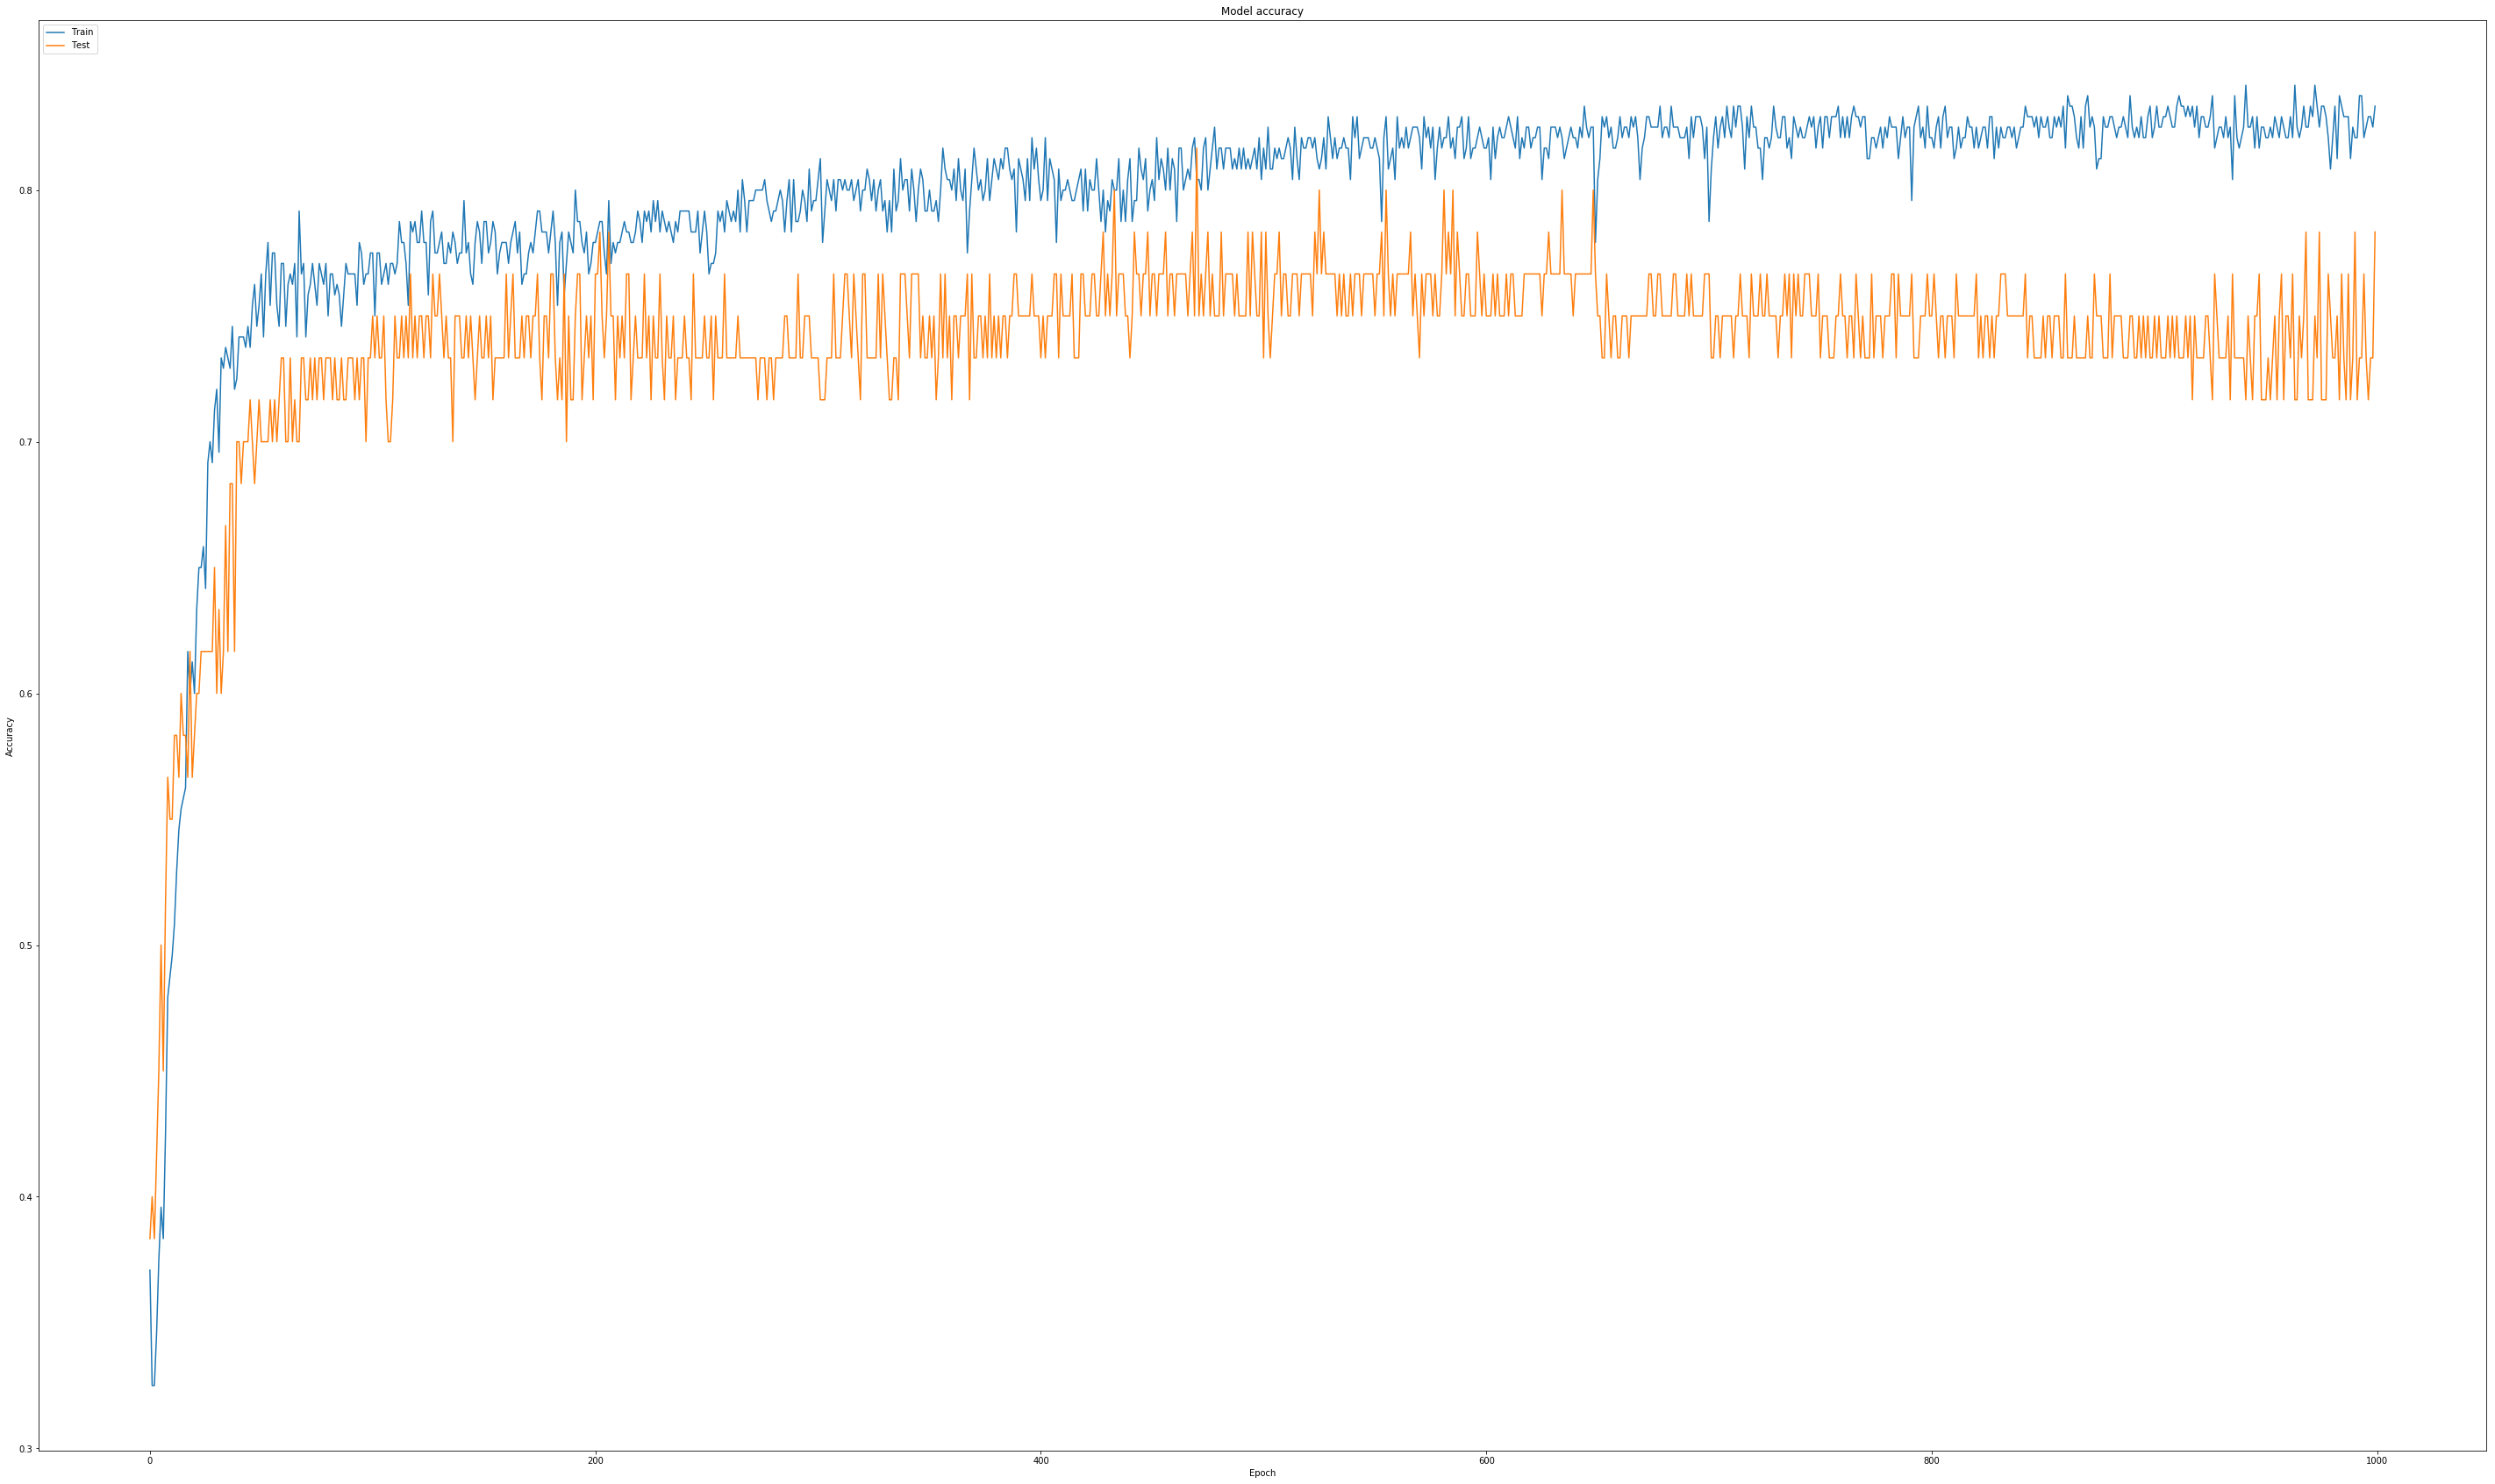

In [63]:
plt.plot(classifier.history.history['acc'])
plt.plot(classifier.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

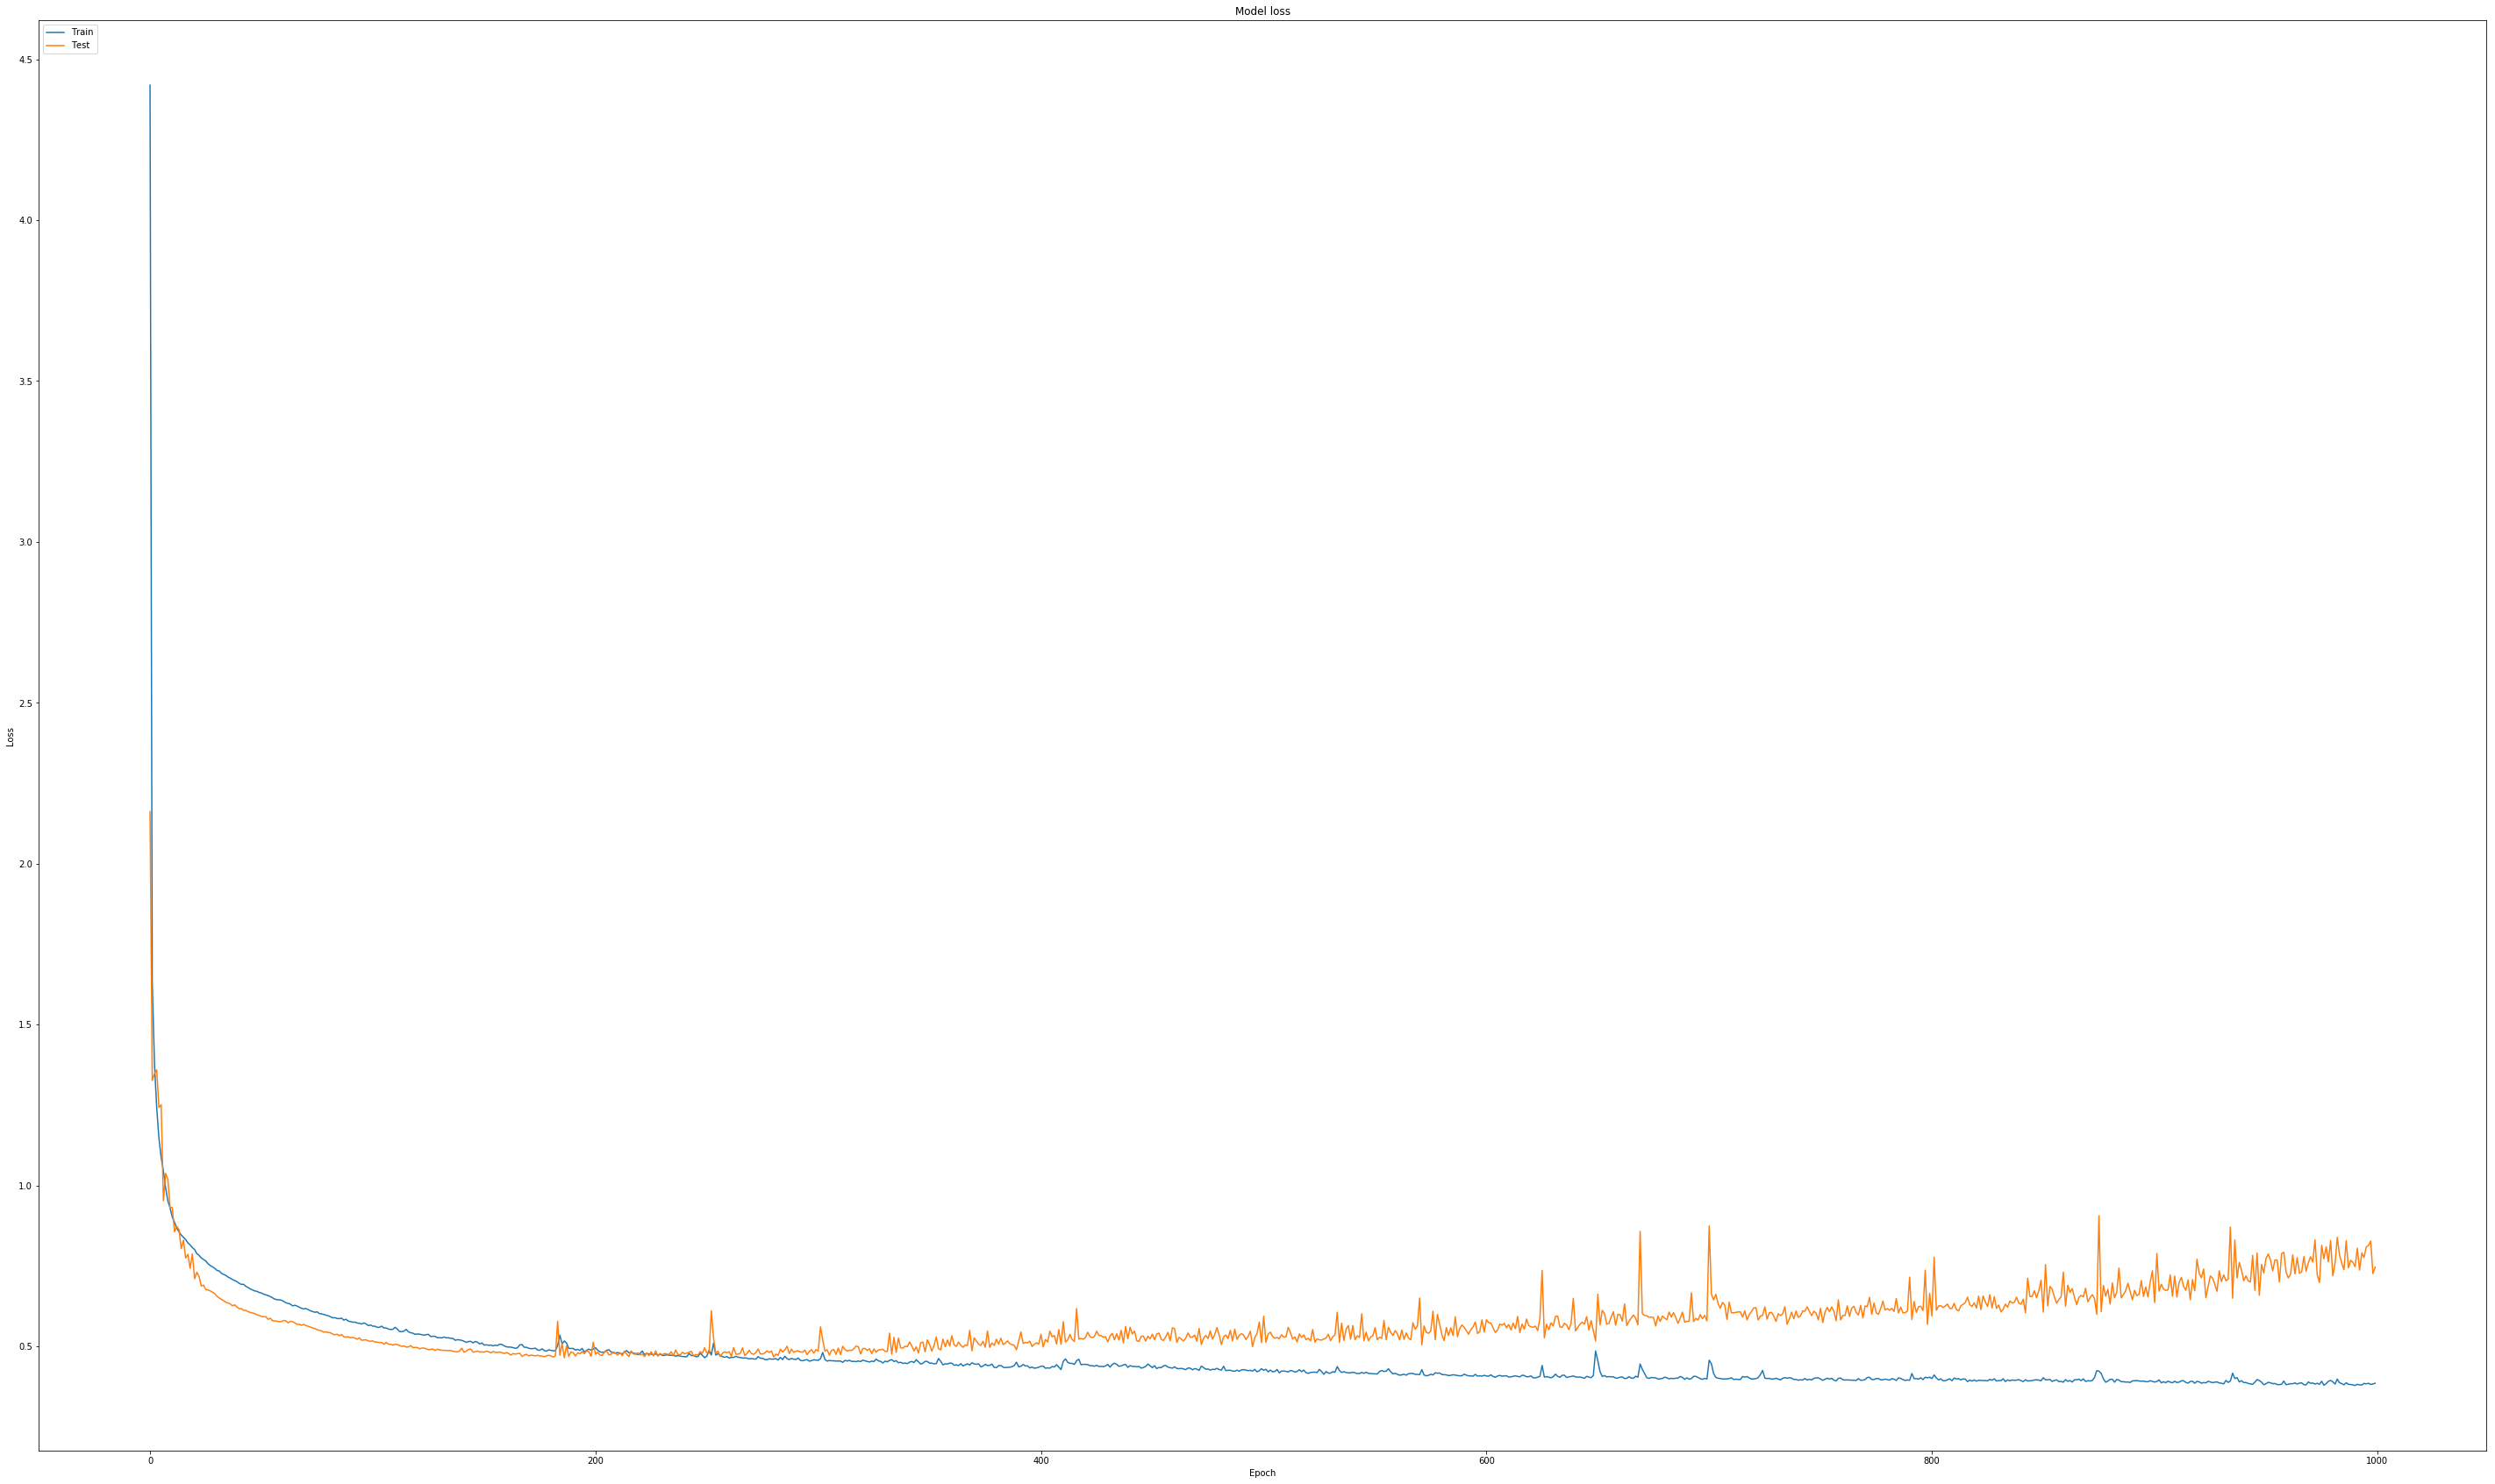

In [64]:
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [43]:
xgb_model = XGBClassifier()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['multi:softprob'],
              'learning_rate': [0.05,0.2], #so called `eta` value
              'max_depth': [6,10,12],
              'min_child_weight': [4,11,20],
              'silent': [1],
              'subsample': [0.8,0.6],
              'colsample_bytree': [0.7,0.8],
              'n_estimators': [5,40,100] #number of trees, change it to 1000 for better results
              }

In [44]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=5,  
                   verbose=2, refit=True)

In [45]:
clf.fit(x_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 508 tasks      | elapsed:   20.2s
[Parallel(n_jobs=5)]: Done 648 out of 648 | elapsed:   24.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'nthread': [4], 'objective': ['multi:softprob'], 'learning_rate': [0.05, 0.2], 'max_depth': [6, 10, 12], 'min_child_weight': [4, 11, 20], 'silent': [1], 'subsample': [0.8, 0.6], 'colsample_bytree': [0.7, 0.8], 'n_estimators': [5, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [46]:
output = clf.predict(x_test)
accuracy_score(output, y_test)

0.8166666666666667

In [56]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.01, min_weight_fraction_leaf=0.27)
model_RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.27, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
y_pred = model_RF.predict(x_test)
accuracy_score(y_pred,y_test)

0.8333333333333334

In [41]:
y_proba = model_RF.predict_proba(x_test)

In [42]:
from sklearn.metrics import log_loss

log_loss(y_test, y_proba)

0.40748843498625764